# Installing dlib package

Pre-requisite for dlib package is cmake package.   
If you dont have cmake in your system    
_!pip install cmake_

then

_!pip install dlib_

If you are using conda as I am to install packages

create a new virtual environment then run 

_conda install -c conda-forge dlib_


In [ ]:
#Installing face_recognition package
!pip install face_recognition
'''
NOTE: Pre-requiste conda install -c akode face_recognition_models or else 'import face_recognition' throws error in 
python 3.7.7
'''

In [2]:
# Importing required libraries
import os
import dlib
import face_recognition
import numpy as np
from skimage import data, exposure
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2 

%matplotlib inline 
# the above line is necessary to running a python notebook in browser

In [12]:
#Setting the working directory 
os.chdir('R:\\Projects\\Face recognition nuclei tech')

os.getcwd() # check current working directory


'R:\\Projects\\Face recognition nuclei tech'

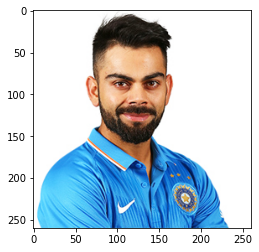

In [13]:
# Load the images to create a database
img = cv2.imread('VKT.jpg')
virat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # changing BGR to RGB
#plotting the image
plt.imshow(virat)


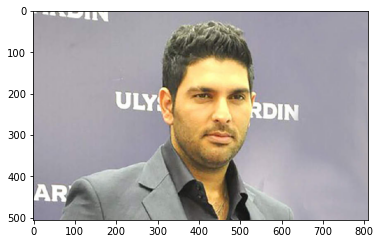

In [14]:
img1 = cv2.imread('YST.jpg')
yuvraj = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # changing BGR to RGB
#plotting the image
plt.imshow(yuvraj)


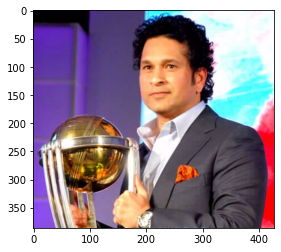

In [15]:
img2 = cv2.imread('ST_T.jpg')
sachin = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # changing BGR to RGB
#plotting the image
master = plt.imshow(sachin)


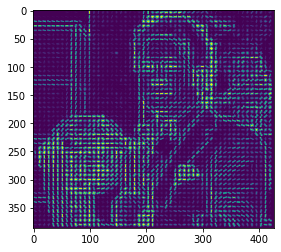

In [16]:
#lets see the HOG features
fd,hog_image = hog(sachin, orientations=8, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, multichannel=True)

# Plot hog image, 1st we rescale the hog image
hog_rescaled_img = exposure.rescale_intensity(hog_image, in_range=(0,10))
plt.imshow(hog_rescaled_img)


Face Recognition

In [17]:
#Getting the face encoding of each image
virat_encoding = face_recognition.face_encodings(virat)[0]

yuvraj_encoding = face_recognition.face_encodings(yuvraj)[0]

sachin_encoding = face_recognition.face_encodings(sachin)[0]

# creating a database of encoding by string them in a list
labelled_encodings = [
    virat_encoding, 
    yuvraj_encoding, 
    sachin_encoding
]

# Face Recognition
## Test1
Using Face recognition package

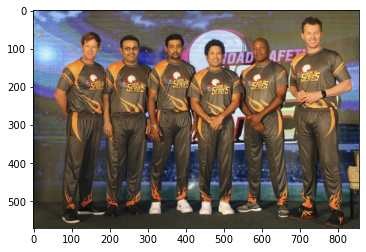

In [18]:
#Loading the image we want to check
image = cv2.imread('Testim.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

# get face encoding of any(all) faces in the image 
unkimage_encodings = face_recognition.face_encodings(unknown_image)

In [20]:
for unkimage_encoding in unkimage_encodings:
    #looping through the encoding list to check which matches with the unkown encoding(image)
    for labelled_encoding in labelled_encodings:
        results = face_recognition.compare_faces(labelled_encodings,unkimage_encoding, tolerance=0.8)

    name = 'no known face'

    if results[0] == True:
        name = 'Virat Kohli'
    elif results[1] == True:
        name = 'Yuvraj Singh'
    elif results[2] == True:
        name= 'Sachin Tendulkar'

print(f'Found {name} in the photo!')


Found Sachin Tendulkar in the photo!


## Test 2
 Using scipy paxkage

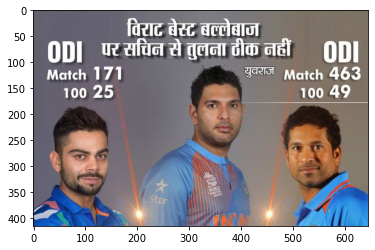

In [21]:
#Loading the image we want to check
image1 = cv2.imread('ALL 3.jpg')
unknown_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image1)

# get face encoding of any(all) faces in the image 
unkimage_encodings1 = face_recognition.face_encodings(unknown_image1)

In [22]:
# importing scipy module to compute the euclidean distance
from scipy.spatial import distance

for unkimage_encoding in unkimage_encodings1:
    #looping through the encoding list to check which matches with the unkown encoding(image)
    results =[]
    for labelled_encoding in labelled_encodings:
        d= distance.euclidean(labelled_encoding, unkimage_encoding)#if we change
        results.append(d)
    threshold = 0.8
    #subsequently threshold values 0.6 and 0.9 predicts Sachin and Virat respectively
    results = np.array(results) <= threshold
    
    name = 'no known face'
    
    if results[0]:
        name = 'Virat Kohli'
    elif results[1]:
        name = 'Yuvraj Singh'
    elif results[2]:
        name= 'Sachin Tendulkar'
print(f'Found {name} in the photo!')

Found Yuvraj Singh in the photo!


## Test 3
Again with face_recognition

Found Virat Kohli in the photo!


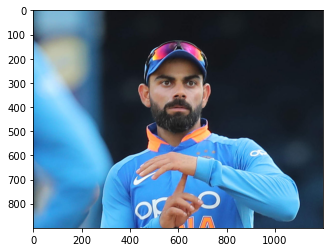

In [23]:
#Loading the image we want to check
image2 = cv2.imread('Testim1.jpg')
unknown_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image2)

# get face encoding of any(all) faces in the image 
unkimage_encodings2 = face_recognition.face_encodings(unknown_image2)

# importing scipy module to compute the euclidean distance
from scipy.spatial import distance

for unkimage_encoding in unkimage_encodings2:
    #looping through the encoding list to check which matches with the unkown encoding(image)
    results =[]
    for labelled_encoding in labelled_encodings:
        d= distance.euclidean(labelled_encoding, unkimage_encoding)#if we change
        results.append(d)
    threshold = 0.6
    
    results = np.array(results) <= threshold
    
    name = 'no known face'
    
    if results[0]:
        name = 'Virat Kohli'
    elif results[1]:
        name = 'Yuvraj Singh'
    elif results[2]:
        name= 'Sachin Tendulkar'
print(f'Found {name} in the photo!')

## Test 4
Again with face_recognition

Found Yuvraj Singh in the photo!


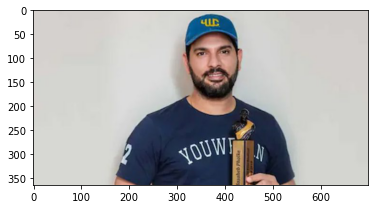

In [24]:
#Loading the image we want to check
image3 = cv2.imread('Testim2.jpg')
unknown_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image3)

# get face encoding of any(all) faces in the image 
unkimage_encodings3 = face_recognition.face_encodings(unknown_image3)

# importing scipy module to compute the euclidean distance
from scipy.spatial import distance

for unkimage_encoding in unkimage_encodings3:
    #looping through the encoding list to check which matches with the unkown encoding(image)
    results =[]
    for labelled_encoding in labelled_encodings:
        d= distance.euclidean(labelled_encoding, unkimage_encoding)#if we change
        results.append(d)
    threshold = 0.6
    
    results = np.array(results) <= threshold
    
    name = 'no known face'
    
    if results[0]:
        name = 'Virat Kohli'
    elif results[1]:
        name = 'Yuvraj Singh'
    elif results[2]:
        name= 'Sachin Tendulkar'
print(f'Found {name} in the photo!')

# Face Detection
OpenCV

In [25]:
names = 'YUVI'
image4 = cv2.imread('Testim2.jpg')
(top,right,bottom,left) = face_recognition.face_locations(image4)[0]
cv2.rectangle(image4,(left,top),(right,bottom), (0,0,255,),2)
cv2.putText(image4,names,(right,bottom), cv2.FONT_HERSHEY_TRIPLEX,1,(0,0,255),1)
cv2.imshow('',image4)
cv2.waitKey(0)
cv2.destroyAllWindows()